> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate TMdb Movie Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset**: I choose the TMDb movie data set for data analysis. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.I would like to find intresting patterns in the dataset.
Total Rows = 10866
Total Columns = 21
After Seeing the dataset, we can say that some columns contain missing values and some rows are duplicated

> **Questions**: 
   1. Which movies are most popular in each decade?
   2. The top 10 most profital movies
   3. The most profitable movies and least profital movies
   4. How does the profit change with the time?
   5. Does the popular movie always get high vote?
   6. What kind of properties are associated with movies with profit?

<!-- Dataset
I choose the TMDb movie data set for data analysis. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.I would like to find other intresting patterns in the dataset.

Contain:

Total Rows = 10866
Total Columns = 21
After Seeing the dataset we can say that some columns is contain null values
Questions -->

In [1]:
# import all the packages
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
> Explore the dataset and get a basic information from the data,which help the data cleaning and further analysis

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


In [3]:
# load the data and print a few lines out for inspection
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# get the number of rows and columns of DataFrame
df.shape

(10866, 21)

In [5]:
# display a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# get a descriptive statistics for each column of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# check rows with missing data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# get all the column names 
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

> Observation From The Dataset:

The unit of 'budget', 'revenue', 'budget_adj', 'revenue_adj' is not given.I will assume the currency is US dollor.
Lots of movies in the dataset contain null values.The datatype for release_date column is string and disordered. And there are more strings value seperated by pipe in cast,production_companies and genres columns.Furthermore, no more explaination about how the popularity is calculated.  


### Data Cleaning (Removing The Unused Information From The Dataset)
Information That We Need To Delete Or Modify
   1. Remove the colums that are not needed in the analysis process(The reason for keeping budget_adj and revenue_adj is that those two values has been adjusted by inflation)
   2. Remove the rows having null value.
   3. Remove duplicated rows from the dataset

In [9]:
# drop the unuseful columns in the dataset
df.drop(columns=['imdb_id','budget', 'revenue','homepage', 'tagline', 'keywords', 'overview','release_date'],inplace=True)
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
# drop rows with missing values
print(df.isnull().sum())
df.dropna(how='any', inplace=True)
df.isnull().sum().any()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


False

In [11]:
# dedupe data
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
# check the cleaned result
df.duplicated().sum()

1


0

In [12]:
#  get a descriptive statistics for each column of cleaned dataset
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,63189.640810,0.694721,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07
std,90718.059987,1.036931,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08
min,5.000000,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10221.500000,0.232710,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18677.500000,0.419762,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00
75%,70577.250000,0.776408,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07
max,417859.000000,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which movies are most popular in each decade?)

In [13]:
# check the range of the time
time_range = sorted(list(df['release_year'].unique()))
print(time_range)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [14]:
start_year = time_range[0] // 10 * 10
interval = 10

decades = []
title = []
popularity = []
while start_year < time_range[-1]:
    aux_df = df.query(f'release_year >= {start_year} & release_year < {start_year + interval}')
    aux_df.set_index('original_title', inplace=True)
    decades.append(str(start_year) + 's' )
    title.append(aux_df['popularity'].idxmax())
    popularity.append(aux_df['popularity'].max())
    start_year += interval
    
pop_movie_decade = pd.DataFrame({'decades':decades, 'title':title,'popularity':popularity})
pop_movie_decade 
    

,decades,title,popularity
0,1960s,2001: A Space Odyssey,3.309196
1,1970s,Star Wars,12.037933
2,1980s,Back to the Future,6.095293
3,1990s,Fight Club,8.947905
4,2000s,Avatar,9.432768
5,2010s,Jurassic World,32.985763


Text(0.5, 1.0, 'Most popular Movies from 1960s to 2010s')

<Figure size 576x720 with 0 Axes>

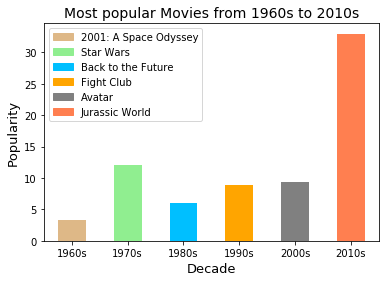

In [15]:
# make a plot showing the most popular movies in each decade
plt.figure(figsize=(8,10))
# set the color palette for the plot
colors_palette = ['burlywood', 'lightgreen', 'deepskyblue', 'orange', 'grey', 'coral']
# map the color with the corresponding movie title
colors = {t: colors_palette[i] for i, t in enumerate(pop_movie_decade['title'].to_list())} 
pop_movie_decade.plot(kind='bar',x='decades',y='popularity', color=colors.values());
plt.xticks(rotation='horizontal')
# create the legend of the movie title corresponding decade
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
# set labels and title for the plot
plt.xlabel('Decade',fontsize=13)
plt.ylabel('Popularity',fontsize=13)
plt.title('Most popular Movies from 1960s to 2010s',fontsize=14)


### Research Question 2  (The top 10 most profital movies)

In [16]:
# add a new column in the dataframe named 'profit'
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']
df_copy = df.copy()
# sort the copy of the DataFrame as the decreasing order of the adjusted profit
df_copy.sort_values(by='profit_adj',ascending=False,inplace=True)
# filter the top 10 profital movies 
x = df_copy['original_title'][:10].to_list()
y = df_copy['profit_adj'][:10].to_list()

Text(0.5, 1.0, 'The Top 10 Most Profital Movies')

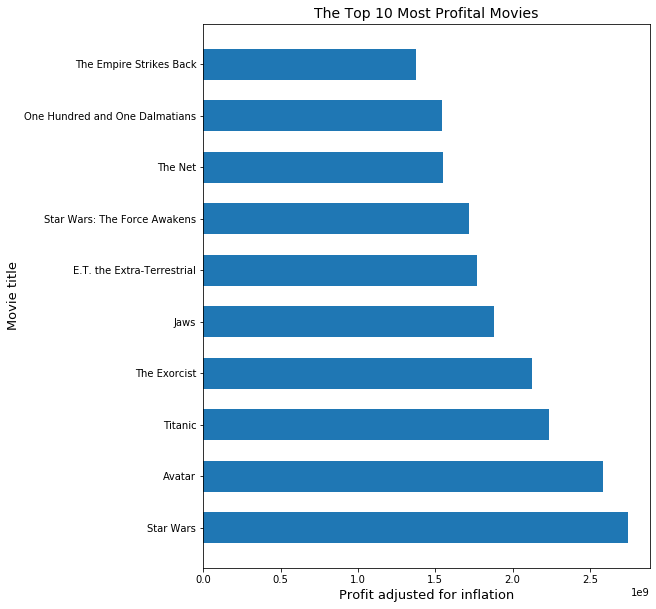

In [17]:
# create a horizontal bar plot of top 10 profital movies
plt.figure(figsize=(8,10))
plt.barh(x, y, height=0.6);
# set labels and title for the plot
plt.xlabel('Profit adjusted for inflation',fontsize=13)
plt.ylabel('Movie title',fontsize=13)
plt.title('The Top 10 Most Profital Movies',fontsize=14)

### Research Question 3  (The most profitable movies and least profital movies)

In [18]:
# use the function 'idmin' to find the index of most and least profitable movie.
def find_minmax(x):
    min_index = df[x].idxmin()
    max_index = df[x].idxmax()
    
    #print the movie with most and least profit
    print('Most profitable movie '+ ' : '+ df['original_title'][max_index]+' with '+ str(df[x][max_index]))
    print('Least profitable movie '+ ' : '+ df['original_title'][min_index]+' with '+str(df[x][min_index]))
    
find_minmax('profit_adj')

Most profitable movie  : Star Wars with 2750136650.919176
Least profitable movie  : The Warrior's Way with -413912431.0


### Research Question 4 (How the profit change with the time)

Text(0, 0.5, 'Profit adjusted for inflation')

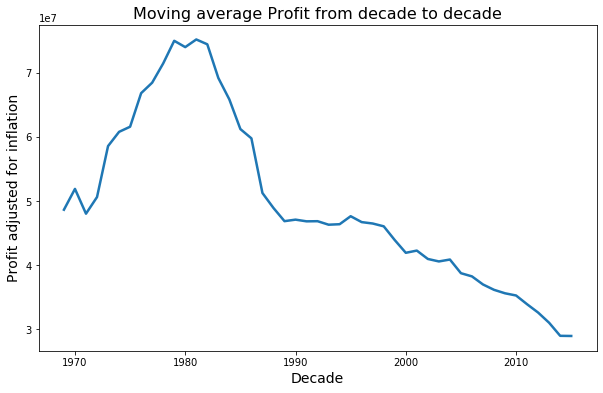

In [19]:
# get the moving average of profit_adj for each decade 
profit_avg = df.groupby('release_year').mean()['profit_adj']
ma_10years = profit_avg.rolling(10).mean()
# plot the trands of profit with decades
plt.figure(figsize=(10, 6))
plt.plot(profit_avg.index, ma_10years, linewidth=2.5);
# set labels and title for the plot
plt.title('Moving average Profit from decade to decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Profit adjusted for inflation', fontsize=14)

### Research Question 5 (Does the popular movie always get high vote?)

In [20]:
# Bin edges that will be used to "cut" the data of popularity into groups(min, 25%, 50%, 75% and max of the popularity column)
bin_edges = [ 0.000065,0.232710 ,0.383856 ,0.776408 ,32.985763]
# Labels for the four popularity groups
bin_names = [ 'Low','Medium', 'Moderately High', 'High']
# Creates popuar levels column
df['pop_levels'] = pd.cut(df['popularity'], bin_edges, labels=bin_names)
# Checks for successful creation of this column
df.head()
# Find the mean vote of each popular level with groupby
mean_vote = df.groupby('pop_levels')['vote_average'].mean()
mean_vote

pop_levels
Low                5.805035
Medium             5.791016
Moderately High    5.925763
High               6.309906
Name: vote_average, dtype: float64

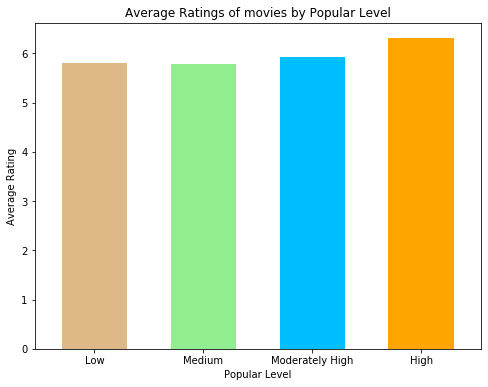

In [21]:
# Create a bar chart with proper labels
plt.figure(figsize=(8, 6))
mean_vote.plot(kind='bar', width=0.6, color=colors_palette)
# set labels,ticks and title for the plot
plt.xticks(rotation=360)
plt.title('Average Ratings of movies by Popular Level')
plt.xlabel('Popular Level')
plt.ylabel('Average Rating');

In [22]:
# check the vote data vloumn of each popular level, id column has unique value
a = df.groupby('pop_levels').count()['id']
a

pop_levels
Low                2443
Medium             2037
Moderately High    2849
High               2443
Name: id, dtype: int64

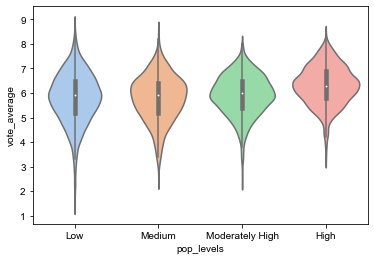

In [23]:
# check the vota data distribution of the each popular level
sns.violinplot(data=df[['pop_levels','vote_average']].copy(), x='pop_levels', y='vote_average', palette='pastel')
sns.set_style('whitegrid');

### Research Question 6 (What Kind Of Properties Are Associated With Movies With High profit?)

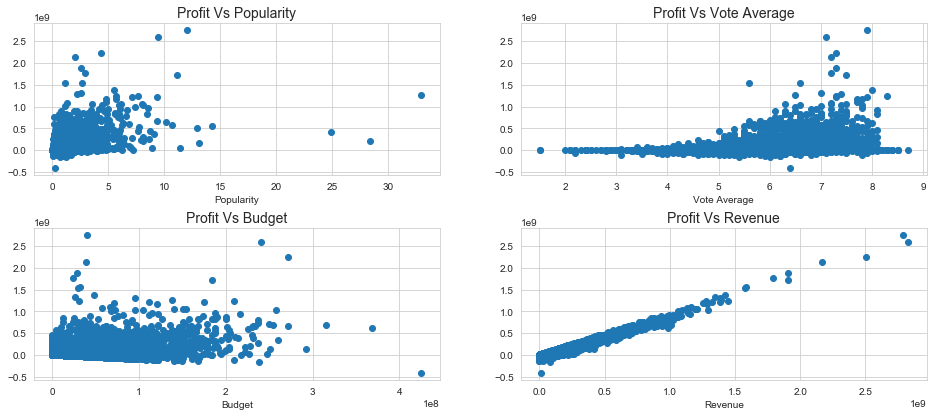

In [24]:
# create the scatter plots to display the correlation between different factors on profit
plt.figure(figsize = (16,6))

plt.subplot(2, 2, 1)
plt.scatter(x=df_copy['popularity'], y=df_copy['profit_adj'])
plt.title('Profit Vs Popularity',fontsize=14)
plt.xlabel('Popularity')
plt.subplot(2, 2, 2)
plt.scatter(x=df_copy['vote_average'], y=df_copy['profit_adj'])
plt.title('Profit Vs Vote Average',fontsize=14)
plt.xlabel('Vote Average')
plt.subplot(2, 2, 3)
plt.scatter(x=df_copy['budget_adj'], y=df_copy['profit_adj'])
plt.title('Profit Vs Budget',fontsize=14)
plt.xlabel('Budget')
plt.subplot(2, 2, 4)
plt.scatter(x=df_copy['revenue_adj'], y=df_copy['profit_adj'])
plt.title('Profit Vs Revenue',fontsize=14)
plt.xlabel('Revenue')
plt.subplots_adjust(top=0.95, hspace=0.35)
plt.show()

<a id='conclusions'></a>
## Conclusions

   1. From this dataset, I find the most popular movies for each decades. However, we only have the data until 2015,so Jurassic World which has the highest popularity among other movies is from 2010 to 2015.
   2. The top 10 profital movies are Star Wars, Avatar, Titanic, The Exorcist, Jaws, E.T.the Extra-Terrestrial, Star Wars: The Force Awakens, The Net, One Hundred and One Dalmatians, The Empire Strikes Back.
   3. Most profitable movie  : Star Wars with 2750136650.919176, least profitable movie  : The Warrior's Way with -413912431.0.Since the unit of the budjet_adj and revenue_adj is unknown from the dataset and futher information is needed.
   4. The profit trend: the moving average of profit(adjusted by inflation) increases with the increase of the year. Until around 1980, it reaches the top and then starts to decline with the increase of the year.Especially, the moving average of 1980s decrease more steeply than that of following decades.
   5. The most popular movies do get the higher rates according to the current dataset, which follws the common sense. It worth mentioning that here I use average vote to refer to the vote condition. For futher investigation, I check the sample volumn for each popularity level, there not much difference among each popularity level,the biggest difference is around 800 and there is no difference between highly popular level and lowly popular level.So I use seaborn to check the distribution of vote_average data for each popular level. According to the violin plot, most data are showing around the median, except for the medium popularity level which is left-skewed.
   6. According to the scatter plots for this dataset, there is no clear correlation between profit and popularity. The same finding show in the other two plot of profit VS vote_average and profit VS budget. Only the Revenue display a positive correlation with the profit. 


### Limitation: 

   1. The unit for budjet and revenue is unknow.
   2. No more detailed information about dataset.How the popularity, budget_adj and revenue_adj be calculated. 
   3. For the conclusion 5, I was wondeirng if the review could offer any suggeation about how to explain the observation of left-skewed distribution for 'vote_average' in violin plot.

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!